# Load Data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'../data/marketing_campaign.csv', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.response.value_counts()

response
0    1906
1     334
Name: count, dtype: int64

imbalance

In [7]:
df.drop(columns=[
    'id','year_birth', 'dt_customer',
    'z_costcontact','z_revenue'
], inplace=True)

In [8]:
df.to_csv('../data/data_raw.csv',index=False)

# EDA

In [9]:
df_all = pd.read_csv(f'../data/data_raw.csv')

In [10]:
df_all.columns

Index(['education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'complain', 'response'],
      dtype='object')

In [11]:
df_all.duplicated().sum()

np.int64(182)

In [12]:
df_all['frequency'] = (
    df_all['numdealspurchases'] +
    df_all['numwebpurchases'] +
    df_all['numcatalogpurchases'] +
    df_all['numstorepurchases']
)

df_all['monetary'] = (
    df_all['mntwines'] +
    df_all['mntfruits'] +
    df_all['mntmeatproducts'] +
    df_all['mntfishproducts'] +
    df_all['mntsweetproducts'] +
    df_all['mntgoldprods']
)

In [13]:
df_all.isnull().sum()

education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
response                0
frequency               0
monetary                0
dtype: int64

In [14]:
df_all.dropna(inplace=True)

In [15]:
df_new = df_all.copy()

In [16]:
df_new.drop(columns=[
    'mntwines', 'mntfruits',
    'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
    'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
    'numcatalogpurchases', 'numstorepurchases'
], inplace=True)

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   education          2216 non-null   object 
 1   marital_status     2216 non-null   object 
 2   income             2216 non-null   float64
 3   kidhome            2216 non-null   int64  
 4   teenhome           2216 non-null   int64  
 5   recency            2216 non-null   int64  
 6   numwebvisitsmonth  2216 non-null   int64  
 7   acceptedcmp3       2216 non-null   int64  
 8   acceptedcmp4       2216 non-null   int64  
 9   acceptedcmp5       2216 non-null   int64  
 10  acceptedcmp1       2216 non-null   int64  
 11  acceptedcmp2       2216 non-null   int64  
 12  complain           2216 non-null   int64  
 13  response           2216 non-null   int64  
 14  frequency          2216 non-null   int64  
 15  monetary           2216 non-null   int64  
dtypes: float64(1), int64(13), obj

In [18]:
num = df_new.select_dtypes(include='number')
cat = df_new.select_dtypes(exclude='number')

## Numeric

<Axes: >

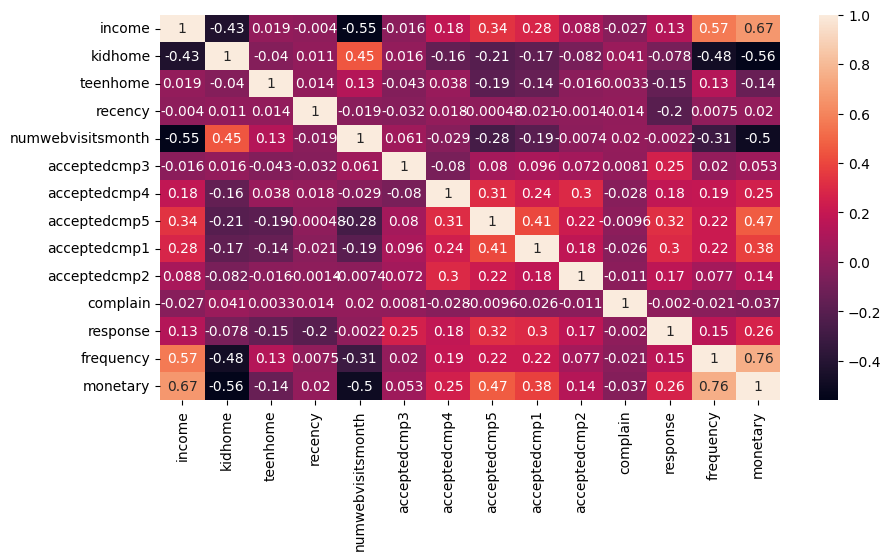

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(num.corr(), annot=True)

In [20]:
cat = [
    'education',
    'marital_status',
    'acceptedcmp1',
    'acceptedcmp2',
    'acceptedcmp3',
    'acceptedcmp4',
    'acceptedcmp5',
    'complain'
]

In [21]:
num = df_new.columns.drop(
    cat
)

In [22]:
target = 'response'
num = num.drop('response')

<Axes: >

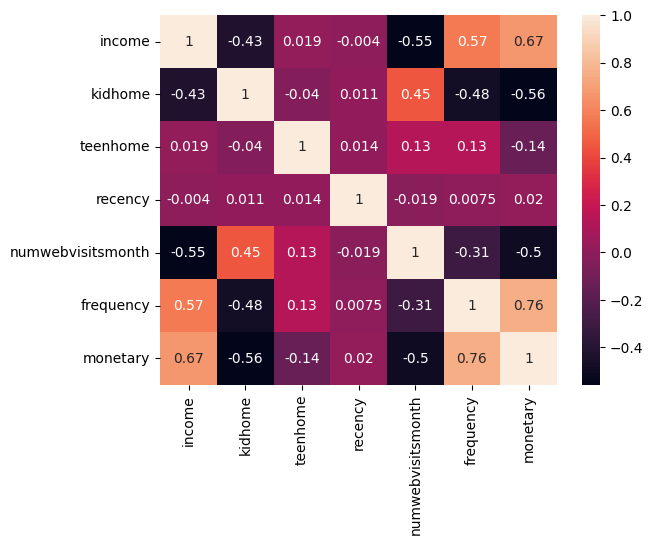

In [23]:
sns.heatmap(df_new[num].corr(), annot=True)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
X = df_new[num].copy()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,income,7.792130
1,kidhome,2.558786
2,teenhome,2.273973
3,recency,3.429736
4,numwebvisitsmonth,5.468244
5,frequency,12.781058
6,monetary,7.636461


$\therefore$ multikolineritas untuk frequency, sehingga dihilangkan

In [26]:
num = num.drop('frequency')

In [27]:
X = df_new[num].copy()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,income,7.159594
1,kidhome,2.550638
2,teenhome,2.023707
3,recency,3.417520
4,numwebvisitsmonth,4.701214
5,monetary,4.544466


<Axes: >

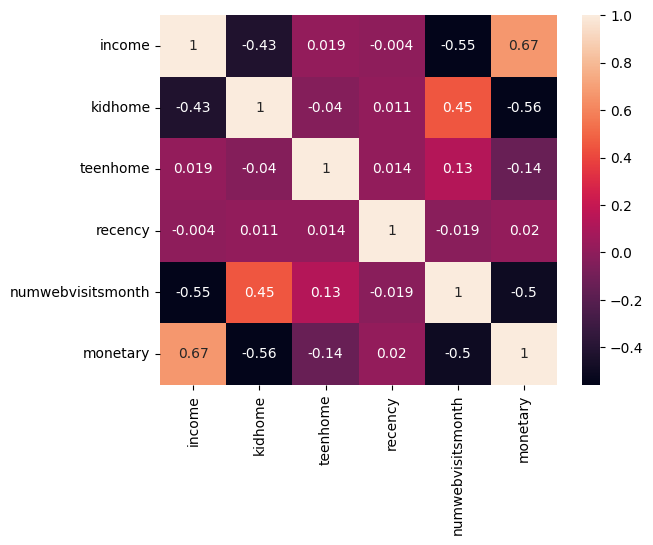

In [28]:
sns.heatmap(df_new[num].corr(), annot=True)

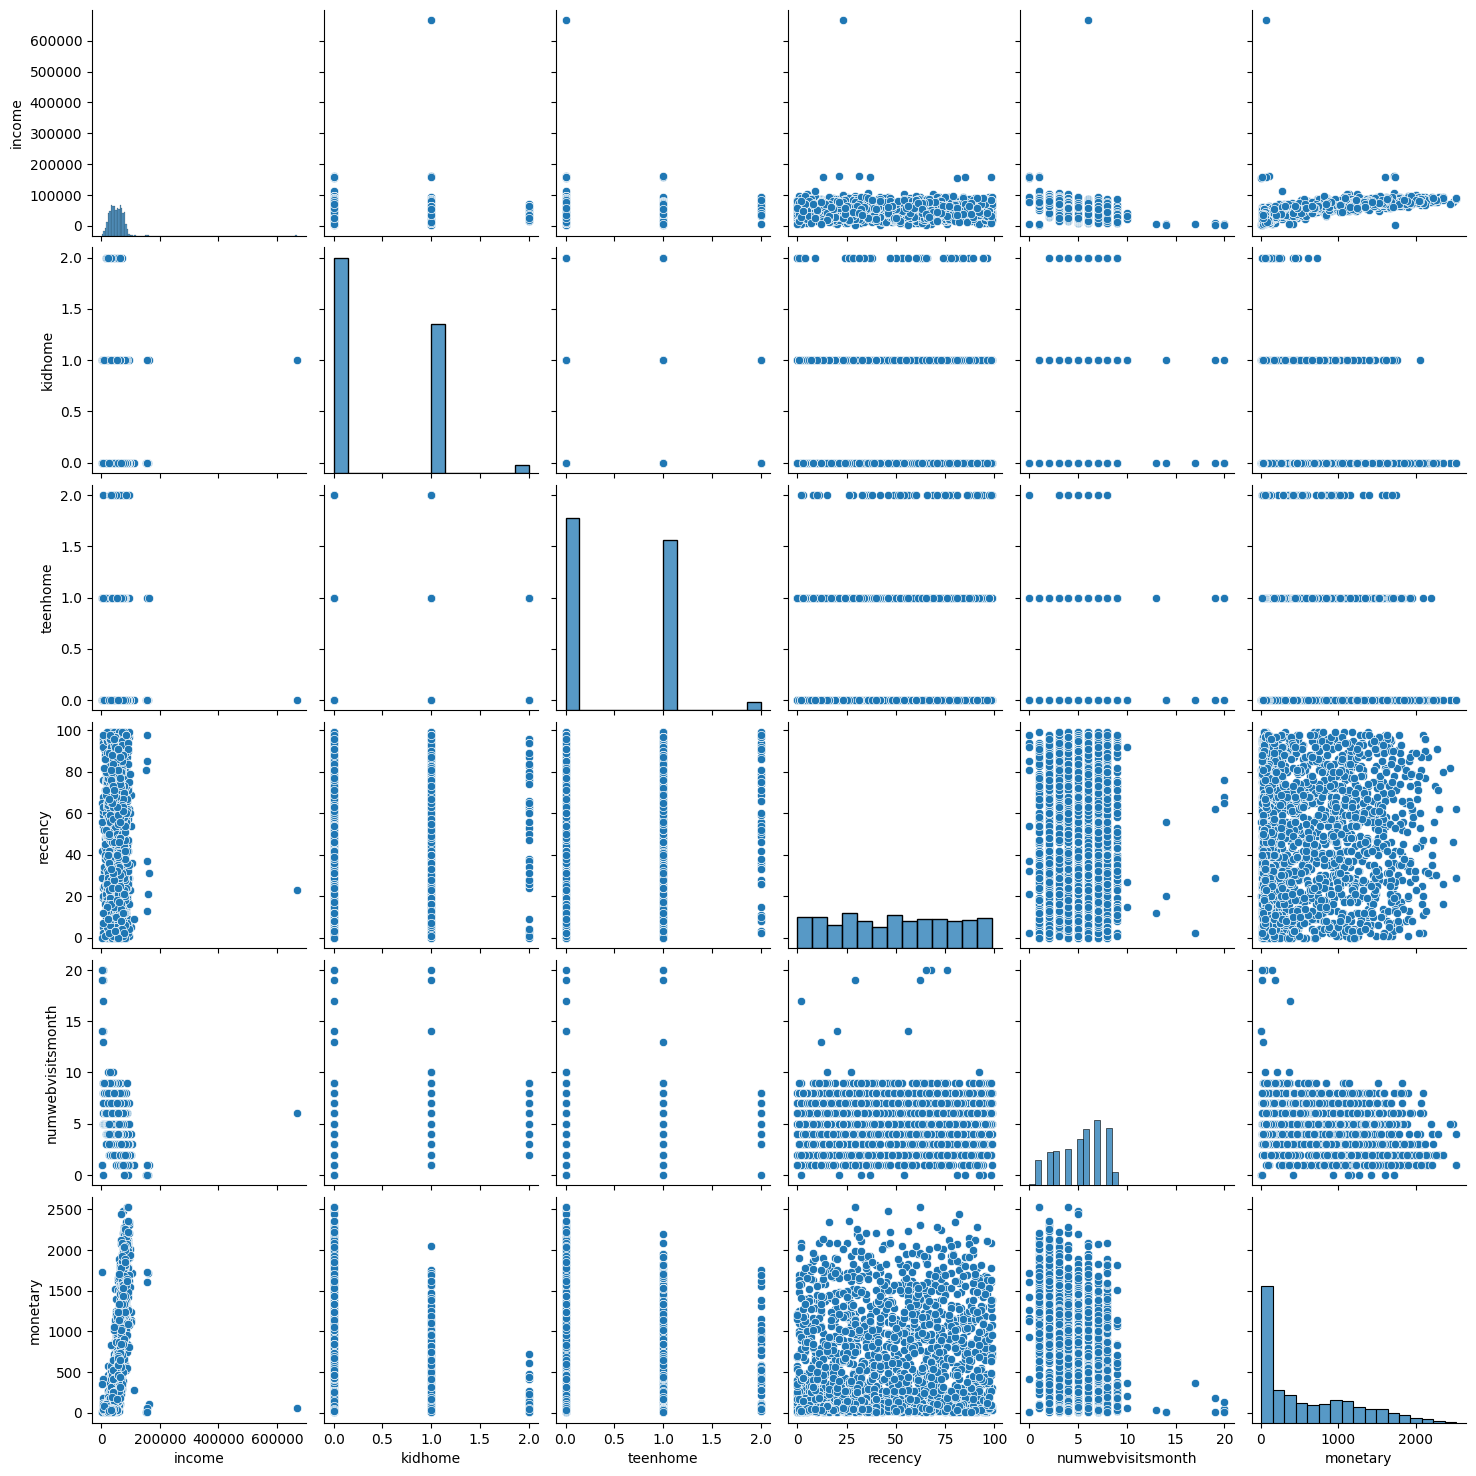

In [29]:
sns.pairplot(df_new[num])

In [30]:
frequency = ['numdealspurchases', 'numwebpurchases',
            'numcatalogpurchases', 'numstorepurchases']

In [31]:
cols = list(num) + list(frequency)

In [32]:
cols

['income',
 'kidhome',
 'teenhome',
 'recency',
 'numwebvisitsmonth',
 'monetary',
 'numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases']

In [33]:
df_new.columns

Index(['education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4',
       'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain', 'response',
       'frequency', 'monetary'],
      dtype='object')

In [34]:
X = df_all[cols].copy()
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,feature,VIF
0,income,8.557253
1,kidhome,2.839022
2,teenhome,2.487744
3,recency,3.503716
4,numwebvisitsmonth,6.152165
5,monetary,8.735268
6,numdealspurchases,3.834974
7,numwebpurchases,5.975202
8,numcatalogpurchases,5.102932
9,numstorepurchases,7.938349


<Axes: >

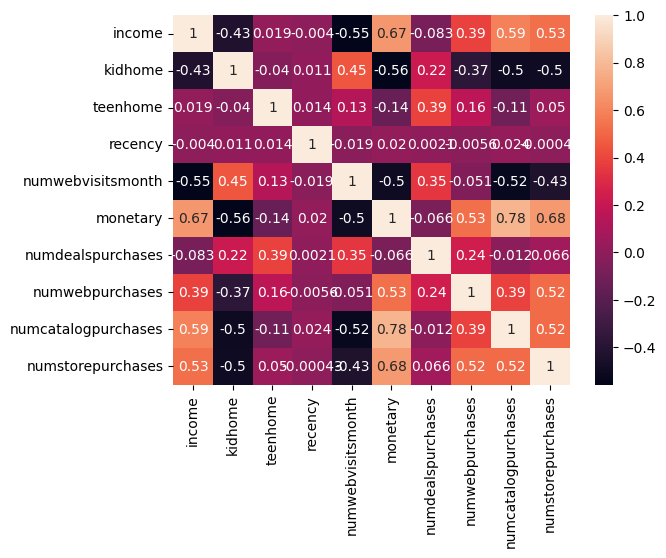

In [35]:
sns.heatmap(df_all[cols].corr(), annot=True)

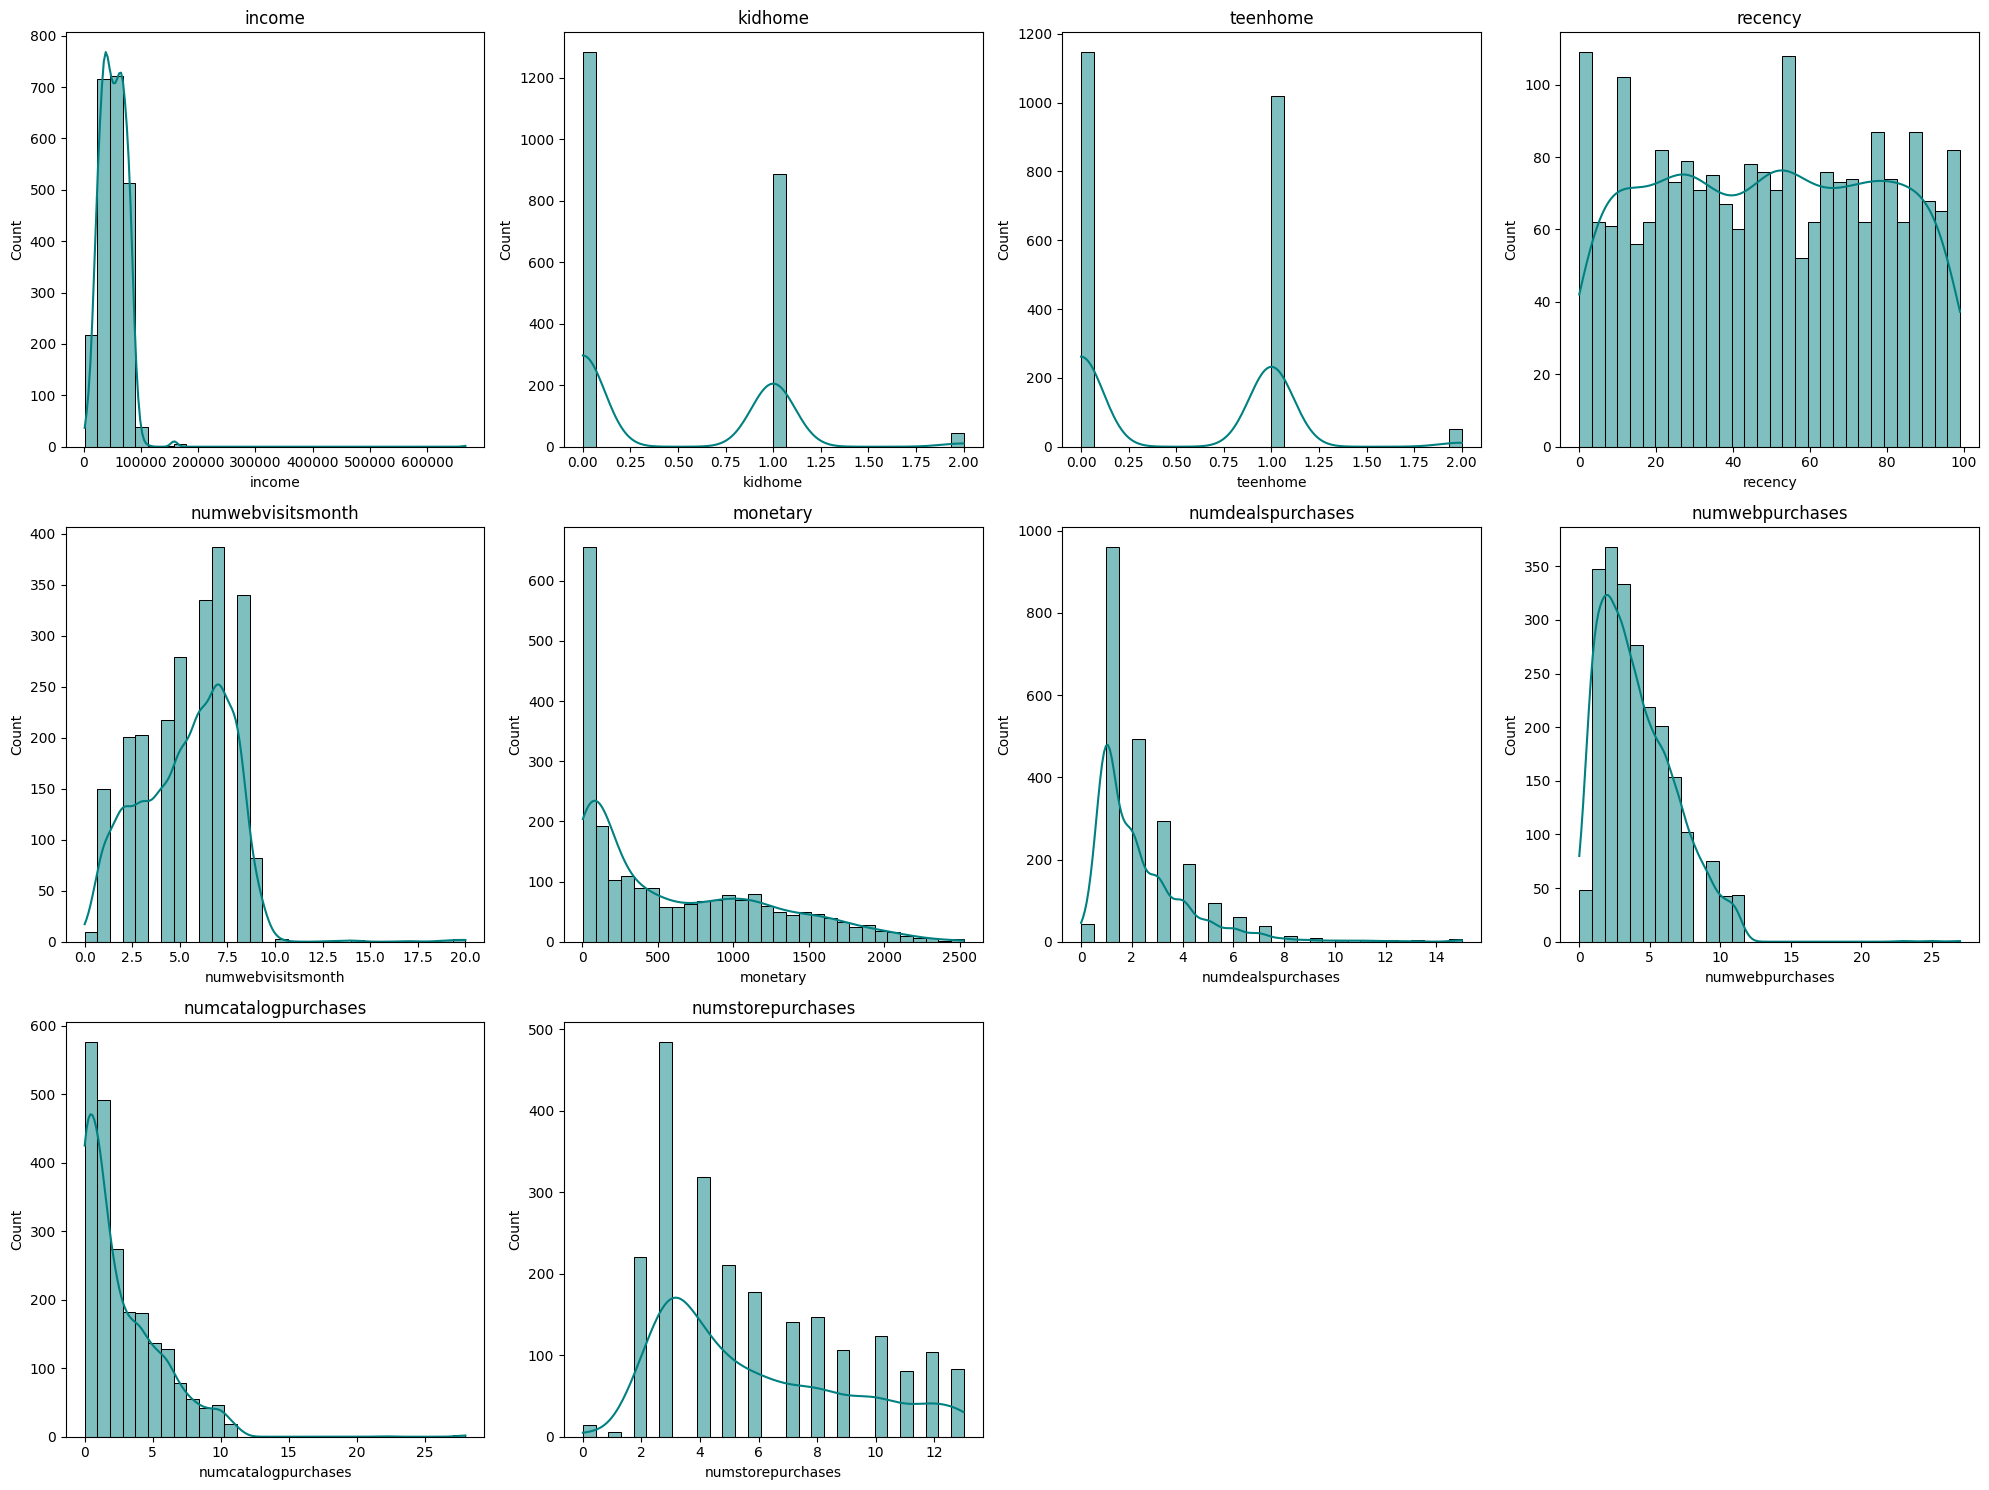

In [36]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df_all[col], kde=True, bins=30, color='teal')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

- Akan dilakukan scaling MinMaxScaler:
    - numwebpurchases
    - numstorepurchases
    - monetary
    - numdealspurchases
    - numcatalogpurchases
    - income
    - recency
    - numwebvisitsmonth

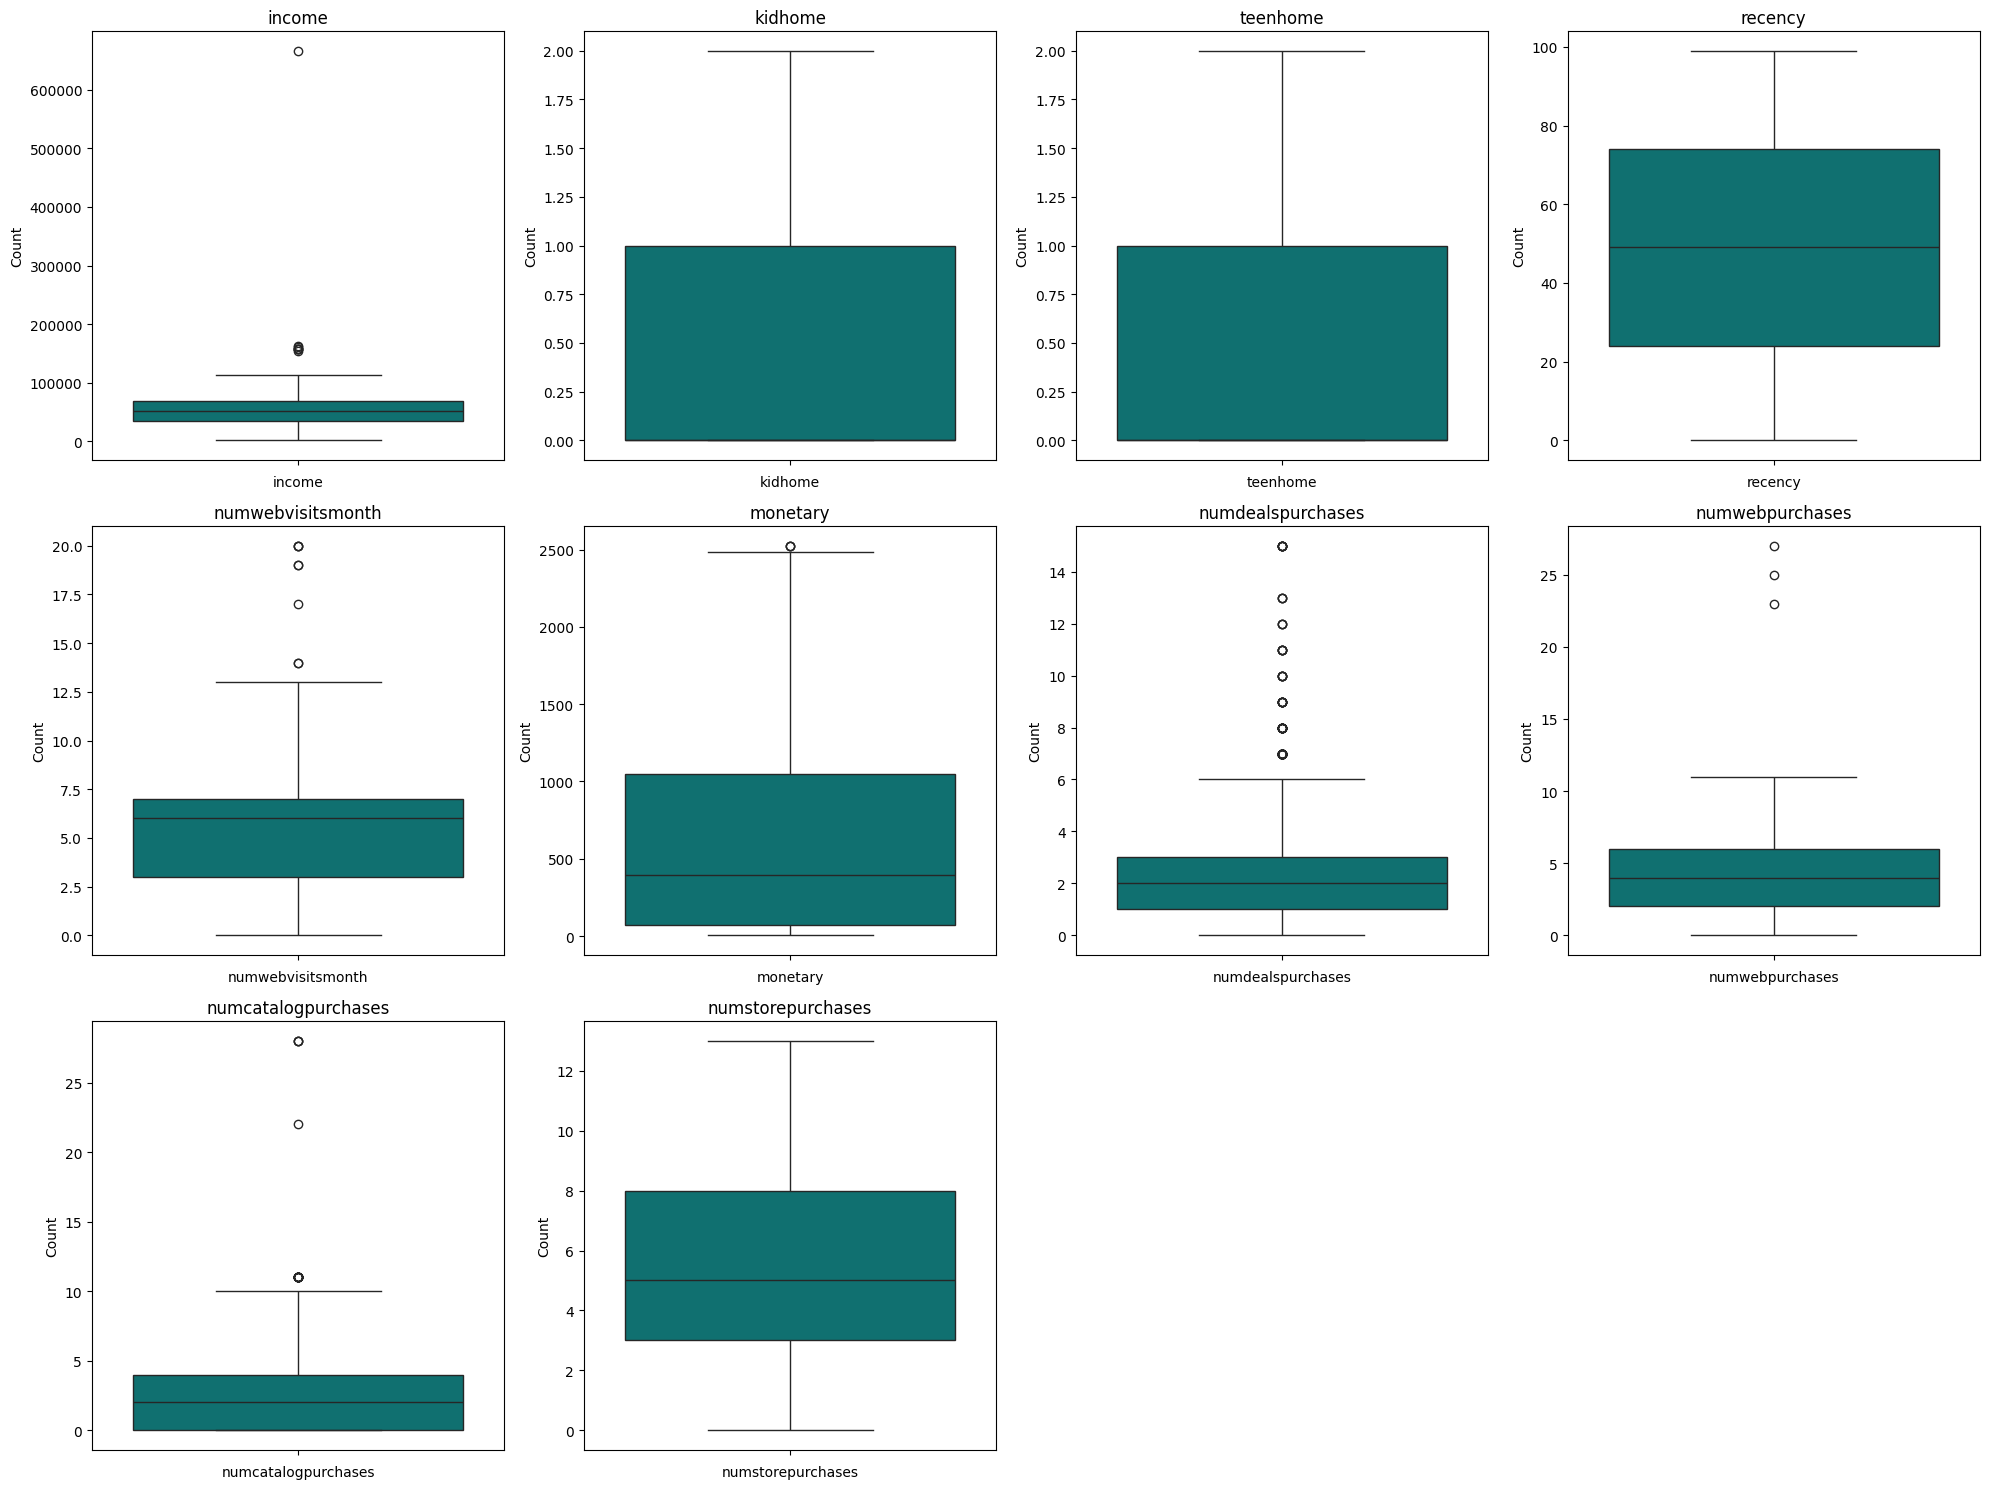

In [37]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(df_all[col], color='teal')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

## Category

In [38]:
df_new['education'].value_counts()

education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [39]:
df_new['marital_status'].value_counts()

marital_status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [40]:
df_new.columns

Index(['education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4',
       'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain', 'response',
       'frequency', 'monetary'],
      dtype='object')

### Encode

In [41]:
df_encoded = df_new[cat].copy()

In [42]:
df_encoded['education'].replace({
    '2n Cycle': 'Master'
}, inplace=True)

edu_map ={
    'Basic': 0,
    'Graduation': 1,
    'Master': 2,
    'PhD': 3
}

df_encoded["education_ord"] = df_encoded["education"].map(edu_map)

C:\Users\Widyadari Parahita\AppData\Local\Temp\ipykernel_16208\3057864388.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['education'].replace({


In [43]:
df_encoded['marital_status'] = df_encoded['marital_status'].replace({
    'Widow':'Divorced',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Absurd': 'Single'
})

marital_encode_map = {
    'Married': 0,
    'Together': 1,
    'Divorced': 2,
    'Single': 3
}

df_encoded["marital_status_ord"] = df_encoded["marital_status"].map(marital_encode_map)

In [44]:
df_encoded.drop(columns=
                ['marital_status','education'],
                inplace=True)

### Chi-Square

In [45]:
from scipy.stats import chi2_contingency

In [46]:
results = []

for var in cat:
    contingency_table = pd.crosstab(df_new[var], df_new['response'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    results.append({
        'Variable': var,
        'Chi-square': chi2,
        'p-value': p,
        'dof': dof
    })

chi_results = pd.DataFrame(results)
chi_results

,Variable,Chi-square,p-value,dof
0,education,23.150710,1.181428e-04,4
1,marital_status,53.506739,2.944019e-09,7
2,acceptedcmp1,192.542075,8.860739e-44,1
3,acceptedcmp2,59.477861,1.236777e-14,1
4,acceptedcmp3,140.262906,2.331968e-32,1
5,acceptedcmp4,70.048748,5.785683e-17,1
6,acceptedcmp5,228.265112,1.424619e-51,1
7,complain,0.000000,1.000000e+00,1


$\therefore$ Karena tidak signifikan, complain akan didrop

In [47]:
df_encoded.drop(columns = 'complain', inplace=True)

In [48]:
fix = pd.concat([df_encoded, df_all[cols], df_all[target]], axis=1)
fix.head()

,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5,education_ord,marital_status_ord,income,kidhome,teenhome,recency,numwebvisitsmonth,monetary,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,response
0,0,0,0,0,0,1,3,58138.0,0,0,58,7,1617,3,8,10,4,1
1,0,0,0,0,0,1,3,46344.0,1,1,38,5,27,2,1,1,2,0
2,0,0,0,0,0,1,1,71613.0,0,0,26,4,776,1,8,2,10,0
3,0,0,0,0,0,1,1,26646.0,1,0,26,6,53,2,2,0,4,0
4,0,0,0,0,0,3,0,58293.0,1,0,94,5,422,5,5,3,6,0


In [49]:
fix.response.value_counts()

response
0    1883
1     333
Name: count, dtype: int64

In [50]:
fix.columns

Index(['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4',
       'acceptedcmp5', 'education_ord', 'marital_status_ord', 'income',
       'kidhome', 'teenhome', 'recency', 'numwebvisitsmonth', 'monetary',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'response'],
      dtype='object')

In [109]:
df_all.drop(columns=['complain']).to_csv(f'../data/data_fix.csv', index=False)

## Why?

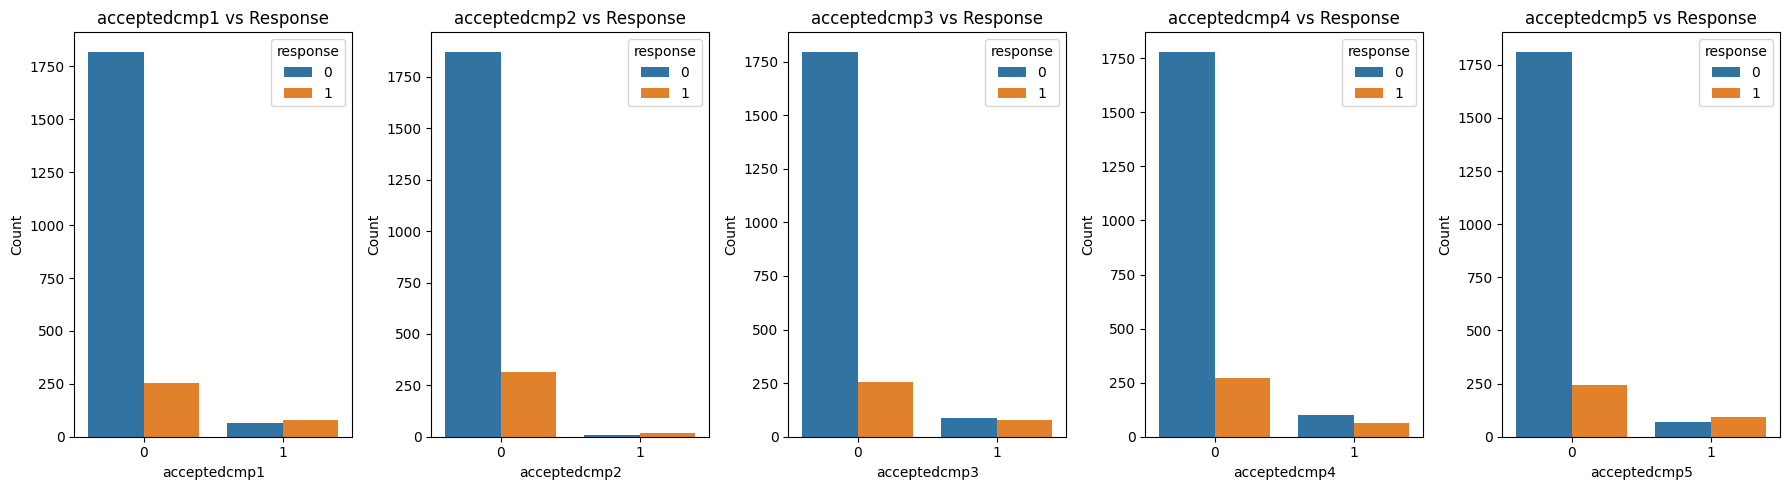

In [52]:
plt.figure(figsize=(18, 5))

campaign_cols = ["acceptedcmp1","acceptedcmp2","acceptedcmp3","acceptedcmp4","acceptedcmp5"]

for i, col in enumerate(campaign_cols, 1):
    plt.subplot(1, 5, i)
    sns.countplot(data=fix, x=col, hue="response")
    plt.title(f"{col} vs Response")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

- Mayoritas customer belum pernah menerima campaign sebelumnya (accepted=0)
- Tapi dari yang pernah menerima campaign sebelumnya (accepted=1), proporsi yang merespons jauh lebih tinggi

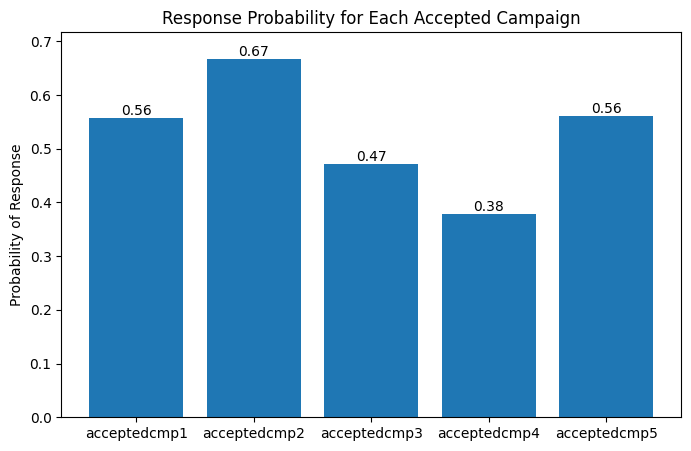

In [53]:
probs = []
cmps = ['acceptedcmp1','acceptedcmp2','acceptedcmp3','acceptedcmp4','acceptedcmp5']

for cmp in cmps:
    prob = fix[fix[cmp]==1]['response'].mean()
    probs.append(prob)

plt.figure(figsize=(8,5))
bars = plt.bar(cmps, probs)

plt.title('Response Probability for Each Accepted Campaign')
plt.ylabel('Probability of Response')
plt.ylim(0, max(probs)+0.05)

for bar, prob in zip(bars, probs):
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height(), 
        f"{prob:.2f}",
        ha='center', 
        va='bottom',
        fontsize=10
    )

plt.show()

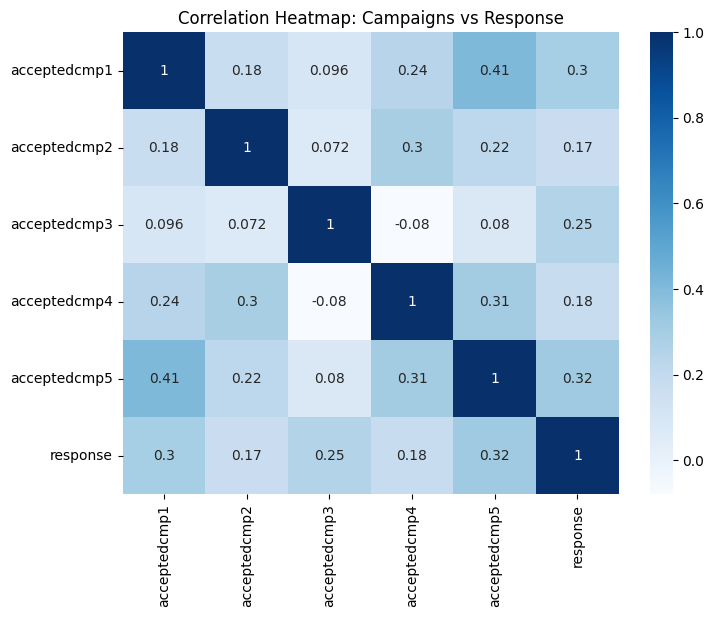

In [54]:
heat = fix[cmps + ['response']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(heat, annot=True, cmap='Blues')
plt.title('Correlation Heatmap: Campaigns vs Response')
plt.show()

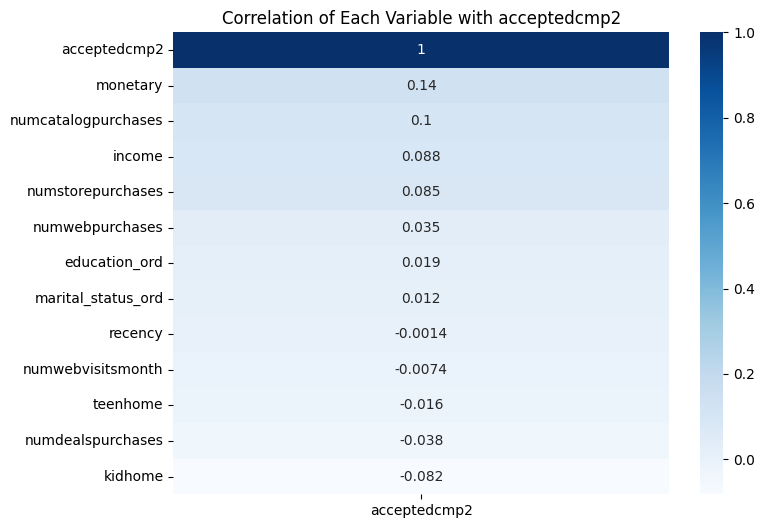

In [55]:
vars_to_check = ['acceptedcmp2','education_ord','marital_status_ord','income','kidhome',
                 'teenhome','recency','numwebvisitsmonth','monetary','numdealspurchases',
                 'numwebpurchases','numcatalogpurchases','numstorepurchases']

corr = fix[vars_to_check].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr[['acceptedcmp2']].sort_values(by='acceptedcmp2', ascending=False),
            annot=True, cmap='Blues')
plt.title("Correlation of Each Variable with acceptedcmp2")
plt.show()

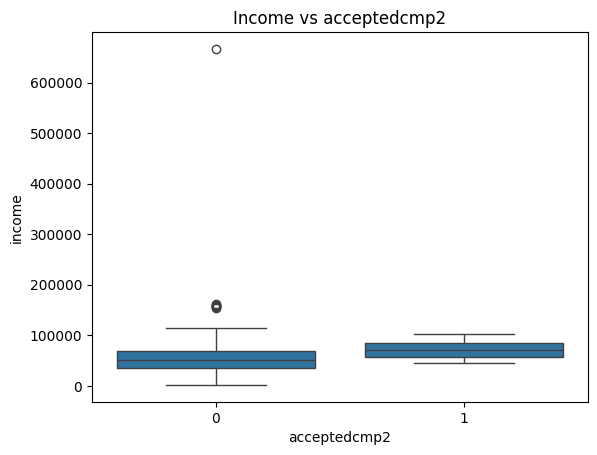

In [56]:
sns.boxplot(x='acceptedcmp2', y='income', data=fix)
plt.title("Income vs acceptedcmp2")
plt.show()

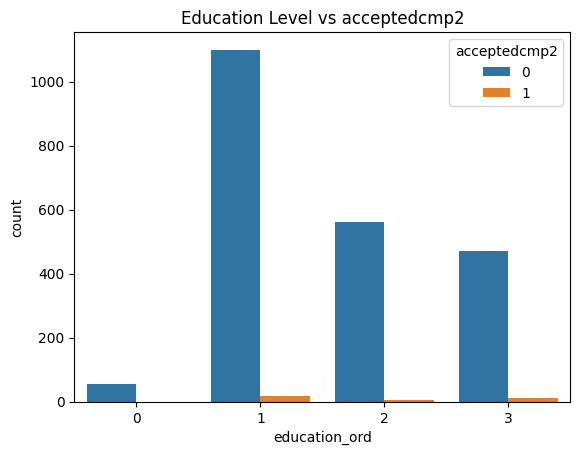

In [57]:
sns.countplot(x='education_ord', hue='acceptedcmp2', data=fix)
plt.title("Education Level vs acceptedcmp2")
plt.show()

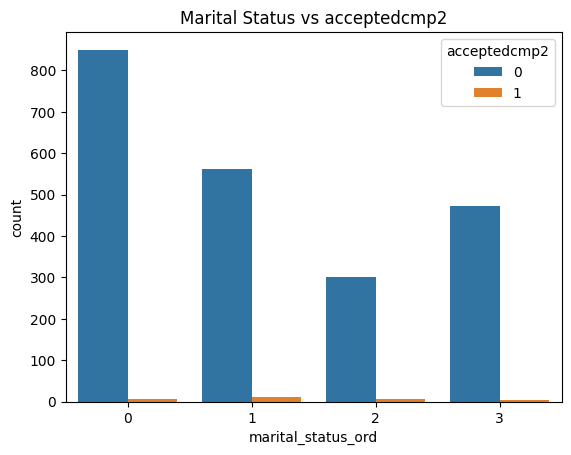

In [58]:
sns.countplot(x='marital_status_ord', hue='acceptedcmp2', data=fix)
plt.title("Marital Status vs acceptedcmp2")
plt.show()

C:\Users\Widyadari Parahita\AppData\Local\Temp\ipykernel_16208\4222380827.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fix, x="response", y="income", palette='crest')


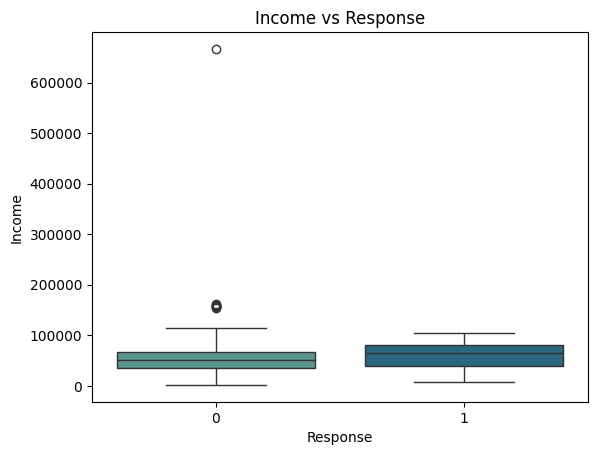

In [59]:
sns.boxplot(data=fix, x="response", y="income", palette='crest')
plt.title("Income vs Response")
plt.xlabel("Response")
plt.ylabel("Income")
plt.show()

Customer dengan pendapatan lebih tinggi lebih responsif terhadap campaign marketing terbaru.

C:\Users\Widyadari Parahita\AppData\Local\Temp\ipykernel_16208\2430114152.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fix, x="response", y="monetary", palette='crest')


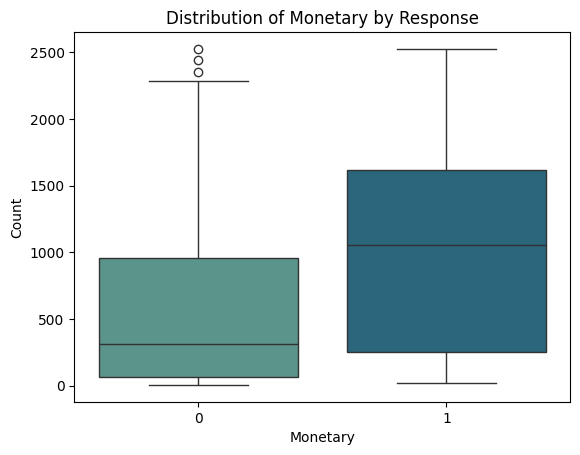

In [60]:
sns.boxplot(data=fix, x="response", y="monetary", palette='crest')
plt.title("Distribution of Monetary by Response")
plt.xlabel("Monetary")
plt.ylabel("Count")
plt.show()


- Customer dengan purchasing power tinggi adalah yang paling responsif.
- Mereka adalah pelanggan valuable yang aktif melakukan transaksi.

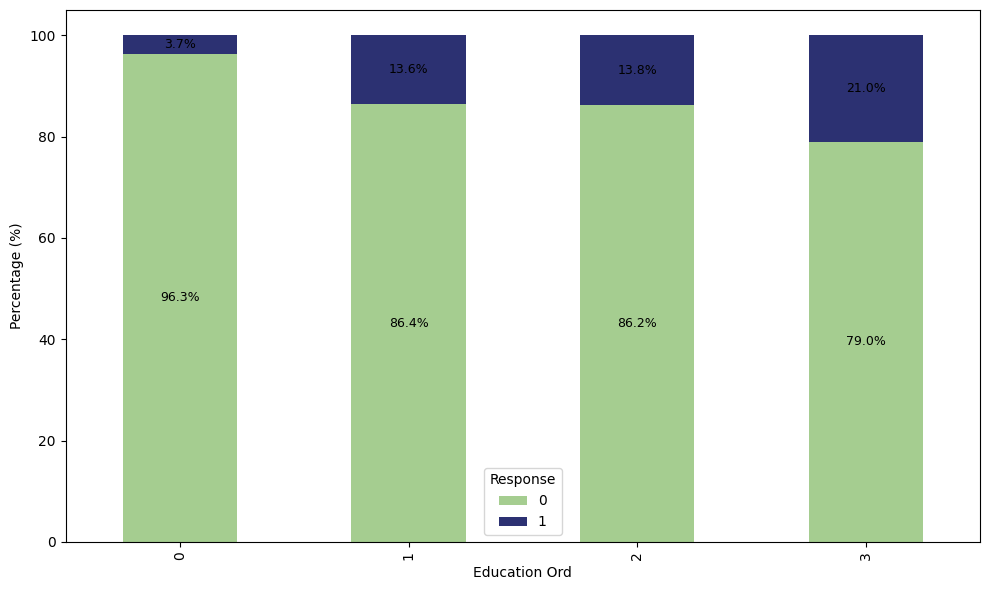

In [61]:
edu_ct = pd.crosstab(fix['education_ord'], fix['response'])
edu_pct = edu_ct.div(edu_ct.sum(axis=1), axis=0) * 100

ax = edu_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='crest'
)

plt.xlabel("Education Ord")
plt.ylabel("Percentage (%)")
plt.legend(title='Response')

for i in range(len(edu_pct)):
    cumulative = 0
    for j in range(len(edu_pct.columns)):
        pct = edu_pct.iloc[i, j]
        if pct > 0:
            ax.text(i, cumulative + pct/2, f"{pct:.1f}%", ha='center', va='center', fontsize=9)
        cumulative += pct

plt.tight_layout()
plt.show()


- Response tertinggi datang dari kelompok pendidikan yang lebih tinggi (ordinal 2 dan 3).
- Kelompok pendidikan rendah hampir tidak merespons campaign bisa jadi ini termasuk faktor income juga.
- Pelanggan berpendidikan tinggi:
    - Lebih paham nilai promo
    - Mungkin lebih engaged dengan brand
    - Lebih sering membaca pesan marketing

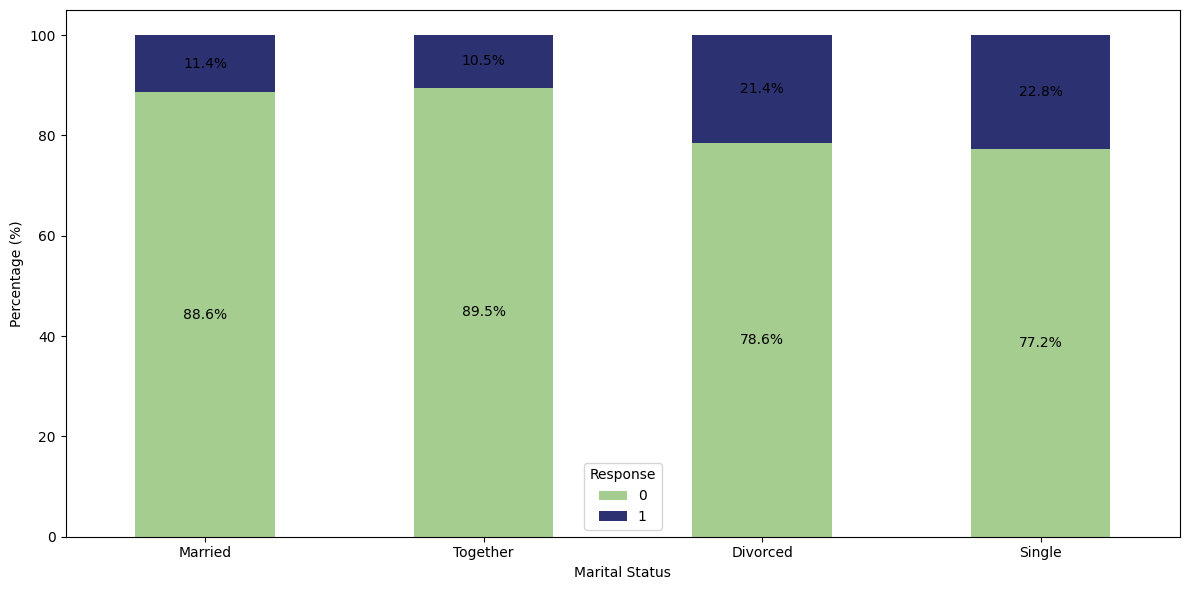

In [100]:
marital_decode_map = {
    0: 'Married',
    1: 'Together',
    2: 'Divorced',
    3: 'Single'
}

marital_labels = fix['marital_status_ord'].map(marital_decode_map)

mar_ct = pd.crosstab(marital_labels, fix['response'])
mar_pct = mar_ct.div(mar_ct.sum(axis=1), axis=0) * 100

# Sort by the encoded order to avoid scrambling
order = ['Married', 'Together', 'Divorced', 'Single']
mar_pct = mar_pct.loc[order]

ax = mar_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='crest'
)

plt.xlabel("Marital Status")
plt.ylabel("Percentage (%)")
plt.legend(title='Response')
plt.xticks(rotation=0)

# Add labels
for i in range(len(mar_pct)):
    cumulative = 0
    for j in range(len(mar_pct.columns)):
        pct = mar_pct.iloc[i, j]
        if pct > 0:
            ax.text(
                i,
                cumulative + pct/2,
                f"{pct:.1f}%",
                ha='center',
                va='center',
                fontsize=10
            )
        cumulative += pct

plt.tight_layout()
plt.show()


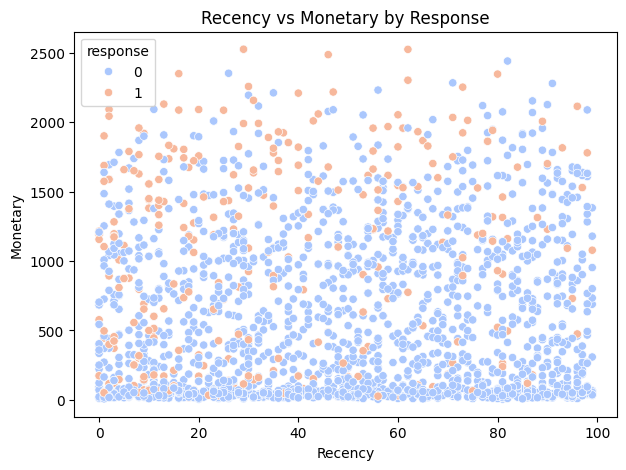

In [63]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=fix, x="recency", y="monetary", hue="response", palette="coolwarm")
plt.title("Recency vs Monetary by Response")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.show()

- Tidak ada pola jelas antara recency dan monetary secara langsung.
- Tetapi:
    - Customer dengan monetary tinggi dan recency rendah → lebih banyak yang merespons.
    - Banyak titik response=1 berada di area spending tinggi.

C:\Users\Widyadari Parahita\AppData\Local\Temp\ipykernel_16208\1787602713.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fix, x="response", y="numwebvisitsmonth", palette='crest')


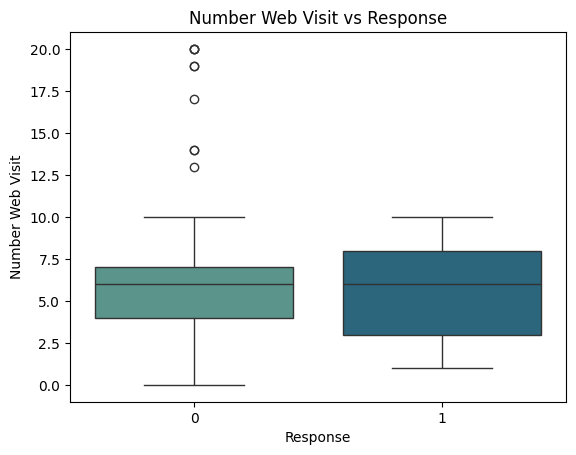

In [64]:
sns.boxplot(data=fix, x="response", y="numwebvisitsmonth", palette='crest')
plt.title("Number Web Visit vs Response")
plt.xlabel("Response")
plt.ylabel("Number Web Visit")
plt.show()

- Semakin sering pelanggan mengunjungi website, semakin besar kemungkinan mereka merespons campaign.
- Mengindikasikan adanya digital engagement effect.

# Modeling

## Feature Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
target = df_all['response']
features = fix.drop(columns='response')

In [67]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [68]:
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [70]:
def scaled(X_train, X_test):
    scaler = MinMaxScaler()

    cols = [
        "income",
        "recency",
        "numwebvisitsmonth",
        "numwebpurchases",
        "numstorepurchases",
        "monetary",
        "numdealspurchases",
        "numcatalogpurchases"
    ]

    # =======================
    # Fit scaler on TRAIN ONLY
    # =======================
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train[cols]),
        columns=[c + "_scaled" for c in cols],
        index=X_train.index
    )

    # Transform TEST (no fitting)
    X_test_scaled = pd.DataFrame(
        scaler.transform(X_test[cols]),
        columns=[c + "_scaled" for c in cols],
        index=X_test.index
    )

    # =======================
    # Combine back with other features
    # =======================
    others_train = X_train.drop(columns=cols)
    X_train_final = pd.concat([others_train, X_train_scaled], axis=1)

    others_test = X_test.drop(columns=cols)
    X_test_final = pd.concat([others_test, X_test_scaled], axis=1)

    return X_train_final, X_test_final

In [71]:
X_train_scaled, X_test_scaled = scaled(X_train_res, X_test)

## Feature Decomposition

In [72]:
from sklearn.decomposition import PCA

In [86]:
def automatic_pca(X_train, X_test, variance_threshold=0.95):
    print("Fitting PCA...")

    # Fit PCA tanpa n_components dulu (full PCA)
    pca_full = PCA()
    pca_full.fit(X_train)

    explained = pca_full.explained_variance_ratio_
    cumulative = np.cumsum(explained)

    # Tentukan jumlah komponen otomatis
    n_components_optimal = np.argmax(cumulative >= variance_threshold) + 1

    print(f"Variance threshold   : {variance_threshold*100:.1f}%")
    print(f"Total components    : {X_train.shape[1]}")
    print(f"Optimal components  : {n_components_optimal}")
    print(f"Explained variance  : {cumulative[n_components_optimal-1]*100:.2f}%")

    # Fit PCA ulang dengan komponen optimal
    pca = PCA(n_components=n_components_optimal)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Scree plot
    plt.figure(figsize=(8,5))
    plt.plot(range(1, len(explained)+1), explained, marker='o', label='Individual Variance')
    plt.plot(range(1, len(cumulative)+1), cumulative, marker='x', label='Cumulative Variance')
    plt.axvline(n_components_optimal, color='red', linestyle='--', label='Optimal Components')
    plt.title("Automatic PCA: Scree Plot")
    plt.xlabel("Principal Component")
    plt.ylabel("Variance Ratio")
    plt.legend()
    plt.grid()
    plt.show()

    return X_train_pca, X_test_pca, n_components_optimal, pca

Fitting PCA...
Variance threshold   : 95.0%
Total components    : 17
Optimal components  : 9
Explained variance  : 95.99%


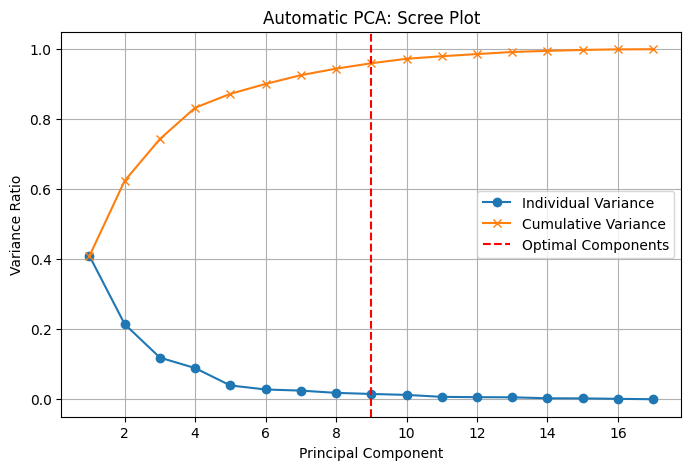

In [87]:
X_train_pca_scaled, X_test_pca_scaled, n_comp_scaled, pca = automatic_pca(X_train_scaled, X_test_scaled)

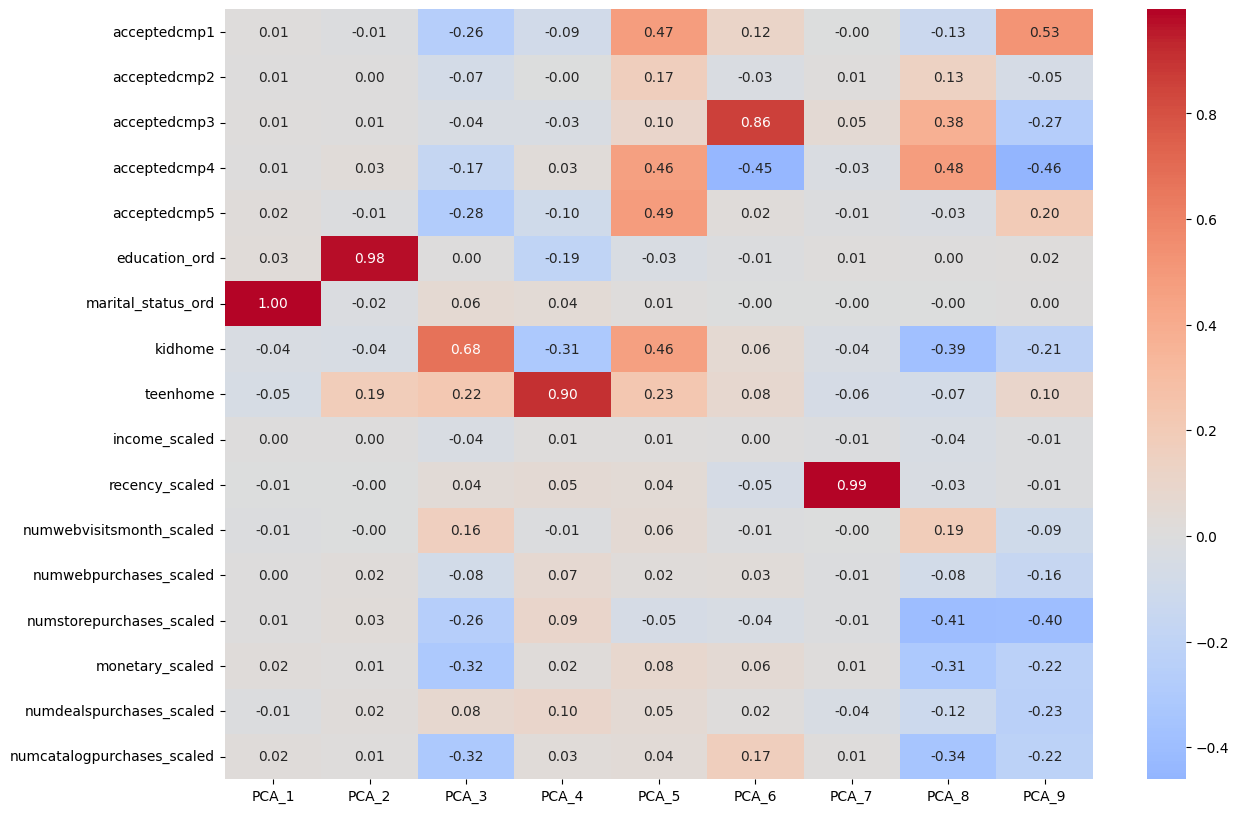

In [95]:
feature_names = X_train_scaled.columns

loadings = pca.components_.T
loading_df = pd.DataFrame(loadings, 
                          index=feature_names,
                          columns=[f"PCA_{i+1}" for i in range(loadings.shape[1])])

plt.figure(figsize=(14,10))
sns.heatmap(loading_df, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(loading_df, annot=False, cmap='coolwarm', center=0)
plt.title("PCA Loadings Heatmap")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")
plt.show()

## Modelling (- Hyperparameter)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
positive = sum(y_train_res == 1)
negative = sum(y_train_res == 0)
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        random_state=42,
        eval_metric="logloss",
        use_label_encoder=False,
        scale_pos_weight = negative/positive
    )
}

In [77]:
from sklearn.metrics import classification_report, accuracy_score

In [102]:
results = []

for name, model in models.items():
    
    # Train model
    model.fit(X_train_pca_scaled, y_train_res)

    # Predict on train and test
    y_pred_train = model.predict(X_train_pca_scaled)
    y_pred_test = model.predict(X_test_pca_scaled)

    # === TRAIN METRICS ===
    report_train = classification_report(y_train_res, y_pred_train, output_dict=True)

    train_acc  = accuracy_score(y_train_res, y_pred_train)
    train_prec = report_train["1"]["precision"]
    train_rec  = report_train["1"]["recall"]
    train_f1   = report_train["1"]["f1-score"]

    # === TEST METRICS ===
    report_test = classification_report(y_test, y_pred_test, output_dict=True)

    test_acc  = accuracy_score(y_test, y_pred_test)
    test_prec = report_test["1"]["precision"]
    test_rec  = report_test["1"]["recall"]
    test_f1   = report_test["1"]["f1-score"]

    # Append to results
    results.append([
        name,
        train_acc, test_acc,
        train_prec, test_prec,
        train_rec, test_rec,
        train_f1, test_f1
    ])

# Convert to DataFrame
results_df = pd.DataFrame(
    results,
    columns=[
        "Model",
        "Train Accuracy", "Test Accuracy",
        "Train Precision", "Test Precision",
        "Train Recall", "Test Recall",
        "Train F1", "Test F1"
    ]
)

results_df


c:\Users\Widyadari Parahita\anaconda\envs\mlops310\lib\site-packages\xgboost\training.py:199: UserWarning: [20:42:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,Logistic Regression,0.783404,0.783459,0.657795,0.376289,0.729958,0.760417,0.692000,0.503448
1,KNN,0.825598,0.843609,0.815642,0.459184,0.616034,0.468750,0.701923,0.463918
2,Decision Tree,0.997187,0.774436,1.000000,0.359375,0.991561,0.718750,0.995763,0.479167
3,Random Forest,0.997187,0.845113,0.991632,0.471545,1.000000,0.604167,0.995798,0.529680
4,Gradient Boosting,0.939522,0.845113,0.975490,0.472868,0.839662,0.635417,0.902494,0.542222
5,XGBoost,0.997187,0.822556,0.991632,0.432927,1.000000,0.739583,0.995798,0.546154


# Modeling (+Hyperparameter)

In [80]:
import optuna
from optuna.samplers import TPESampler

c:\Users\Widyadari Parahita\anaconda\envs\mlops310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [106]:
def objective(trial):

    model_name = trial.suggest_categorical(
        "model",
        ["logit", "knn", "dt", "rf", "gb", "xgb"]
    )

    # --- MODEL SELECTION ---
    if model_name == "logit":
        C = trial.suggest_float("C", 0.001, 10, log=True)
        model = LogisticRegression(
            C=C, class_weight="balanced", max_iter=500
        )

    elif model_name == "knn":
        n = trial.suggest_int("n_neighbors", 3, 25)
        model = KNeighborsClassifier(n_neighbors=n)

    elif model_name == "dt":
        max_depth = trial.suggest_int("max_depth", 2, 20)
        model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    elif model_name == "rf":
        n_estimators = trial.suggest_int("n_estimators", 100, 800)
        max_depth = trial.suggest_int("max_depth", 2, 20)
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            class_weight="balanced",
            random_state=42
        )

    elif model_name == "gb":
        n_estimators = trial.suggest_int("n_estimators", 100, 800)
        lr = trial.suggest_float("learning_rate", 0.01, 0.3)
        model = GradientBoostingClassifier(
            n_estimators=n_estimators,
            learning_rate=lr,
            random_state=42
        )

    elif model_name == "xgb":
        max_depth = trial.suggest_int("max_depth", 3, 10)
        lr = trial.suggest_float("learning_rate", 0.01, 0.3)
        n_estimators = trial.suggest_int("n_estimators", 100, 800)
        subsample = trial.suggest_float("subsample", 0.5, 1.0)
        model = XGBClassifier(
            max_depth=max_depth,
            learning_rate=lr,
            n_estimators=n_estimators,
            subsample=subsample,
            eval_metric="logloss",
            scale_pos_weight=negative/positive,
            random_state=42,
            use_label_encoder=False
        )

    model.fit(X_train_pca_scaled, y_train_res)

    # --- TRAIN PRED ---
    y_pred_train = model.predict(X_train_pca_scaled)
    report_train = classification_report(y_train_res, y_pred_train, output_dict=True)

    train_acc = accuracy_score(y_train_res, y_pred_train)
    train_prec = report_train["1"]["precision"]
    train_rec = report_train["1"]["recall"]
    train_f1 = report_train["1"]["f1-score"]

    # --- TEST PRED ---
    y_pred_test = model.predict(X_test_pca_scaled)
    report_test = classification_report(y_test, y_pred_test, output_dict=True)

    test_acc = accuracy_score(y_test, y_pred_test)
    test_prec = report_test["1"]["precision"]
    test_rec = report_test["1"]["recall"]
    test_f1 = report_test["1"]["f1-score"]

    results_optuna.append([
        trial.number,
        model_name,
        train_acc, test_acc,
        train_prec, test_prec,
        train_rec, test_rec,
        train_f1, test_f1
    ])

    return test_rec

In [108]:
results_optuna = []

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

results_df_optuna = pd.DataFrame(
    results_optuna,
    columns=[
        "Trial","Model",
        "Train Accuracy","Test Accuracy",
        "Train Precision","Test Precision",
        "Train Recall","Test Recall",
        "Train F1","Test F1"
    ]
)

results_df_optuna


[I 2025-12-05 20:55:40,901] A new study created in memory with name: no-name-b277b15f-41b5-415f-8306-85a03b949866
[I 2025-12-05 20:55:55,937] Trial 0 finished with value: 0.6458333333333334 and parameters: {'model': 'rf', 'n_estimators': 516, 'max_depth': 14}. Best is trial 0 with value: 0.6458333333333334.
[I 2025-12-05 20:55:57,575] Trial 1 finished with value: 0.3229166666666667 and parameters: {'model': 'knn', 'n_neighbors': 19}. Best is trial 0 with value: 0.6458333333333334.
[I 2025-12-05 20:56:09,223] Trial 2 finished with value: 0.6666666666666666 and parameters: {'model': 'gb', 'n_estimators': 382, 'learning_rate': 0.14594586958396383}. Best is trial 2 with value: 0.6666666666666666.
[I 2025-12-05 20:56:10,806] Trial 3 finished with value: 0.5625 and parameters: {'model': 'knn', 'n_neighbors': 3}. Best is trial 2 with value: 0.6666666666666666.
[I 2025-12-05 20:56:12,062] Trial 4 finished with value: 0.2916666666666667 and parameters: {'model': 'knn', 'n_neighbors': 20}. Best 

,Trial,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1
0,0,rf,0.997187,0.849624,0.995781,0.484375,0.995781,0.645833,0.995781,0.553571
1,1,knn,0.776371,0.869173,0.854545,0.584906,0.396624,0.322917,0.541787,0.416107
2,2,gb,0.997187,0.834586,1.000000,0.450704,0.991561,0.666667,0.995763,0.537815
3,3,knn,0.849508,0.836090,0.821782,0.446281,0.700422,0.562500,0.756264,0.497696
4,4,knn,0.763713,0.869173,0.870968,0.595745,0.341772,0.291667,0.490909,0.391608
5,5,knn,0.774965,0.863158,0.859813,0.551020,0.388186,0.281250,0.534884,0.372414
6,6,knn,0.763713,0.869173,0.870968,0.595745,0.341772,0.291667,0.490909,0.391608
7,7,knn,0.808720,0.848120,0.806061,0.472527,0.561181,0.447917,0.661692,0.459893
8,8,xgb,0.997187,0.833083,0.991632,0.451613,1.000000,0.729167,0.995798,0.557769
9,9,logit,0.729958,0.736842,0.580645,0.316279,0.683544,0.708333,0.627907,0.437299


In [82]:
study = optuna.create_study(
    direction="maximize",
    sampler=TPESampler(seed=42)
)

study.optimize(objective, n_trials=50)

[I 2025-12-05 18:04:18,133] A new study created in memory with name: no-name-771dec45-b4d7-4c4f-bc3d-72fbc9ccf48e
[I 2025-12-05 18:04:19,055] Trial 0 finished with value: 0.3020833333333333 and parameters: {'model': 'knn', 'n_neighbors': 4}. Best is trial 0 with value: 0.3020833333333333.
[I 2025-12-05 18:04:23,622] Trial 1 finished with value: 0.6354166666666666 and parameters: {'model': 'gb', 'n_estimators': 248, 'learning_rate': 0.06272924049005918}. Best is trial 1 with value: 0.6354166666666666.
c:\Users\Widyadari Parahita\anaconda\envs\mlops310\lib\site-packages\xgboost\training.py:199: UserWarning: [18:04:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-12-05 18:04:25,095] Trial 2 finished with value: 0.75 and parameters: {'model': 'xgb', 'max_depth': 4, 'learning_rate': 0.09472194807521325, 'n_estimators': 356, 'subsample': 0.728034992108518}. Best is 

In [83]:
print("Best Recall:", study.best_value)
print("Best Parameters:", study.best_params)

Best Recall: 0.78125
Best Parameters: {'model': 'logit', 'C': 0.43996983454557664}


In [84]:
best = study.best_params

model_map = {}

if best["model"] == "logit":
    model = LogisticRegression(
        C=best["C"],
        class_weight='balanced',
        max_iter=500
    )

elif best["model"] == "knn":
    model = KNeighborsClassifier(
        n_neighbors=best["n_neighbors"]
    )

elif best["model"] == "dt":
    model = DecisionTreeClassifier(
        max_depth=best["max_depth"],
        random_state=42
    )

elif best["model"] == "rf":
    model = RandomForestClassifier(
        n_estimators=best["n_estimators"],
        max_depth=best["max_depth"],
        class_weight="balanced",
        random_state=42
    )

elif best["model"] == "gb":
    model = GradientBoostingClassifier(
        n_estimators=best["n_estimators"],
        learning_rate=best["learning_rate"],
        random_state=42
    )

elif best["model"] == "xgb":
    model = XGBClassifier(
        max_depth=best["max_depth"],
        learning_rate=best["learning_rate"],
        n_estimators=best["n_estimators"],
        subsample=best["subsample"],
        scale_pos_weight=negative/positive,
        eval_metric="logloss",
        random_state=42,
        use_label_encoder=False
    )

# Final fit
model.fit(X_train_pca_scaled, y_train_res)
y_pred_final = model.predict(X_test_pca_scaled)


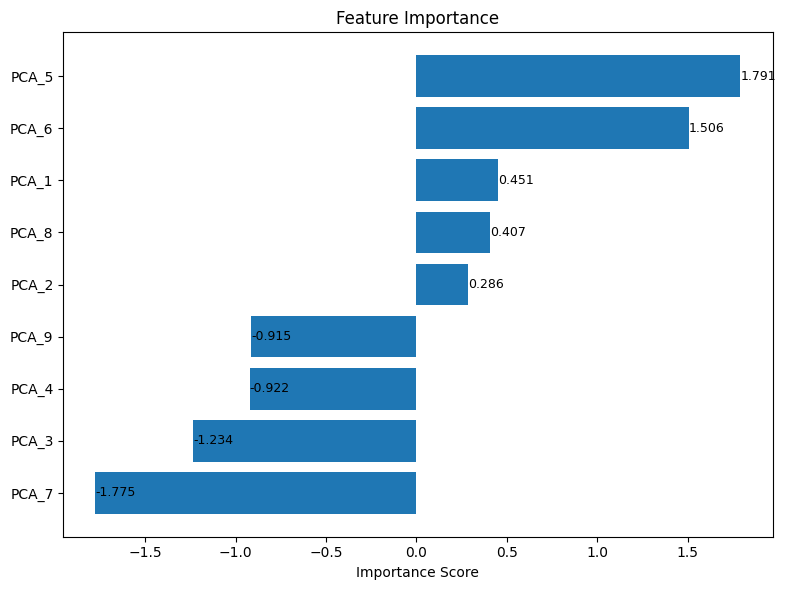

In [94]:
feature_names = [f"PCA_{i+1}" for i in range(X_train_pca_scaled.shape[1])]

def plot_feature_importance(model, feature_names):

    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_

    elif hasattr(model, "coef_"):
        importance = model.coef_[0]

    else:
        print("Model does not support feature importance.")
        return

    indices = np.argsort(importance)[::-1]
    sorted_names = [feature_names[i] for i in indices]
    sorted_importance = importance[indices]

    plt.figure(figsize=(8,6))
    bars = plt.barh(sorted_names, sorted_importance)
    plt.title("Feature Importance")
    plt.xlabel("Importance Score")
    plt.gca().invert_yaxis()

    # Tambahkan angka pada setiap bar
    for bar, val in zip(bars, sorted_importance):
        plt.text(
            bar.get_width(),
            bar.get_y() + bar.get_height() / 2,
            f"{val:.3f}",
            va='center',
            ha='left',
            fontsize=9
        )

    plt.tight_layout()
    plt.show()

plot_feature_importance(model, feature_names)
